# About the data
The data set contains over 370,000 used cars extracted from German Ebay-Kleinanzeigen website. Each used car has 20 attributes to give us some information about the history of each used car. The 20 attributes inlcudes:

* dateCrawled            : when this ad was first crawled, all field-values are taken from this date
* name                   : "name" of the car
* seller                 : private or dealer
* offerType              
* price                  : the price on the ad to sell the car
* abtest                 
* vehicleType            
* yearOfRegistration     : at which year the car was first registered
* gearbox                : manual or automatic
* powerPS                : the power of the car in PS
* model                  
* kilometer              : how many kilometres the car has driven
* monthOfRegistration    : at which month the car was first registered
* fuelType               
* brand                  
* notRepairedDamage      : if the car has a damage which is not repaired yet
* dateCreated            : the date for which the ad at ebay was created
* nrOfPictures           : number of pictures in the ad 
* postalCode             
* lastSeen               : when the crawler saw this ad last online

# Assumptions
There is a myth that a strong or famous brand equals good products, which might not be true. Therefore, 
1. Top 5 brands have a higher price than the least 5 brands
2. Top 5 brands have better performance than the least 5 brands
3. Top 5 brands have lower deprecation rate than the least 5 brands

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

%matplotlib inline
plt.style.use('ggplot')

In [2]:
allData = pd.read_csv("autos.csv",sep=',', encoding='Latin1')

In [3]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

# Clean Data

Remove undesired columns that don't have clear meaning and undesired rows that would make data distortion.

In [4]:
allData.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [5]:
# since all values in nrOfPictures are zero
wellData = allData.drop('nrOfPictures', 1)

In [6]:
print(wellData.groupby('seller').size())

seller
gewerblich         3
privat        371525
dtype: int64


In [7]:
wellData = wellData[wellData['seller'] != 'gewerblich']

In [8]:
print(wellData.groupby('seller').size())

seller
privat    371525
dtype: int64


In [9]:
wellData = wellData.drop('seller', 1)

In [10]:
print (wellData.groupby('offerType').size())

offerType
Angebot    371513
Gesuch         12
dtype: int64


In [11]:
wellData = wellData[wellData['offerType'] != 'Gesuch']
wellData = wellData.drop('offerType', 1)

In [12]:
wellData.columns

Index(['dateCrawled', 'name', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

In [13]:
wellData = wellData.drop('name',1)
wellData = wellData.drop('lastSeen', 1)
wellData = wellData.drop('postalCode', 1)
wellData = wellData.drop('dateCrawled', 1)

In [14]:
wellData = wellData.drop('abtest', 1)

In [15]:
wellData

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated
0,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00
1,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00
2,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00
3,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00
4,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00
5,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00
6,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00
7,0,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00
8,14500,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00
9,999,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00


In [16]:
print (wellData['price'].mean())
print (wellData['price'].max())
print (wellData['price'].min())

17295.699243364295
2147483647
0


In [17]:
pTileDf = wellData.describe(percentiles=[.25, .95, .99])
price25 = pTileDf.loc['25%', 'price']
price95 = pTileDf.loc['95%', 'price']
power25 = pTileDf.loc['25%', 'powerPS']
power95 = pTileDf.loc['95%', 'powerPS']
power99 = pTileDf.loc['99%', 'powerPS']

In [18]:
pTileDf

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,3.715130e+05,371513.000000,371513.000000,371513.000000,371513.000000
mean,1.729570e+04,2004.578273,115.552689,125619.709135,5.734531
std,3.588026e+06,92.868431,192.142534,40110.832918,3.712376
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000
95%,1.979000e+04,2016.000000,231.000000,150000.000000,12.000000
99%,3.600000e+04,2018.000000,340.000000,150000.000000,12.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000


In [19]:
# Remove outliner prices
wellData = wellData[(wellData['price'] >= price25) & (wellData['price'] <= price95)]

In [20]:
wellData.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,260525.000000,260525.000000,260525.000000,260525.000000,260525.000000
mean,5700.396227,2004.826796,122.352335,125643.527493,6.040745
std,4407.156996,56.678904,195.463163,38301.156721,3.593396
min,1150.000000,1000.000000,0.000000,5000.000000,0.000000
25%,2250.000000,2001.000000,80.000000,100000.000000,3.000000
50%,4100.000000,2005.000000,116.000000,150000.000000,6.000000
75%,7950.000000,2008.000000,150.000000,150000.000000,9.000000
max,19790.000000,9999.000000,20000.000000,150000.000000,12.000000


In [21]:
wellData = wellData[(wellData['powerPS'] > power25) & (wellData['powerPS'] < power99 )]
print (wellData['powerPS'].min())
print (wellData['powerPS'].max())

71
339


In [22]:
wellData.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,211930.000000,211930.000000,211930.000000,211930.000000,211930.000000
mean,6144.910631,2004.657208,136.079375,127531.307507,6.143882
std,4514.769237,27.184011,47.258448,36876.173104,3.526517
min,1150.000000,1000.000000,71.000000,5000.000000,0.000000
25%,2500.000000,2001.000000,102.000000,125000.000000,3.000000
50%,4750.000000,2005.000000,128.000000,150000.000000,6.000000
75%,8600.000000,2008.000000,163.000000,150000.000000,9.000000
max,19790.000000,9999.000000,339.000000,150000.000000,12.000000


In [23]:
print (wellData['yearOfRegistration'].min())
print (wellData['yearOfRegistration'].mean())
print (wellData['yearOfRegistration'].max())

1000
2004.6572075685367
9999


In [24]:
yearList = sorted(wellData['yearOfRegistration'].unique())
wellData = wellData[(wellData['yearOfRegistration'] >= 1997) & (wellData['yearOfRegistration'] <= 2017) ]

# Analysis


In [25]:
def count_brands(brandDf,colLabel):
    """
    return: a dataframe of brand distribution
    """
    brandDistribution = pd.DataFrame()
    brandList = brandDf['brand'].unique()
    countList = [len(brandDf[brandDf['brand']==brand]) for brand in brandList]
    brandDistribution[colLabel] = countList
    brandDistribution.index = brandList
    return brandDistribution

In [26]:
def test_samples_significant(sample1, sample2):
    result = ttest_ind(sample1, sample2, equal_var=False)
    print (result)
    if result.pvalue <= 0.05:
        print ("The two population means are different at 0.05 significant level")
    else:
        print ("We cannot conclude that a significant difference does exist due to p-value > 0.05")

In [27]:
brandDistribution = count_brands(wellData, 'The total number of cars')

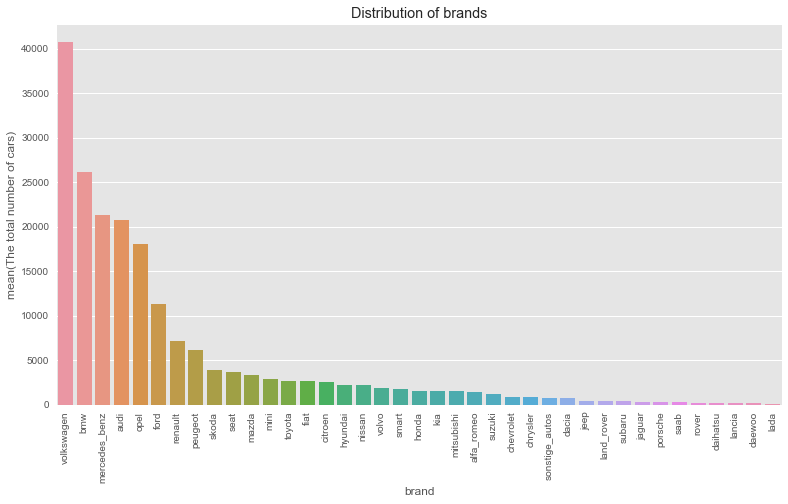

In [28]:
sortBrand = brandDistribution.sort_values(by='The total number of cars', ascending=False)
plt.figure(figsize=(13,7))
sns.barplot(sortBrand.index, sortBrand['The total number of cars'])
plt.title("Distribution of brands")
plt.xlabel("brand")
plt.xticks(rotation=90)
plt.show()

This bar plot shows that the top 5 brands are all famous brands and the number of selling cars is more than 15,000. The last 5 brands are unknown brands and the number of selling cars is less than 5000. From here we can know most people still like to buy famous brands of cars rather than unknow brands of cars.

### Analyze the price between the top 5 brands and the last 5 brands

In [29]:
topPopDf = wellData[(wellData['brand'] == 'audi') | 
                         (wellData['brand'] == 'volkswagen') |
                         (wellData['brand'] == 'bmw') |
                         (wellData['brand'] == 'opel') |
                         (wellData['brand'] == 'mercedes_benz')]
# topPopDf[(topPopDf['brand'] == 'audi')]['model'].unique()
# topPopDf[(topPopDf['brand'] == 'volkswagen')]['model'].unique()
lastPopDf = wellData[(wellData['brand'] == 'lancia') |
                          (wellData['brand'] == 'rover') |
                          (wellData['brand'] == 'lada') |
                          (wellData['brand'] == 'daewoo') |
                          (wellData['brand'] == 'daihatsu')]
# Check for missing data
print (topPopDf['price'].isnull().values.any())
print (lastPopDf['price'].isnull().values.any())

False
False


* Determin if the difference of these two samples is statistically significant 

In [30]:
test_samples_significant(topPopDf['price'], lastPopDf['price'])

Ttest_indResult(statistic=33.987015300088771, pvalue=3.2193953100844973e-146)
The two population means are different at 0.05 significant level


* Generate a line plot with the top 5 brands and the last 5 brands data sets when vehicle type versus price 

The differences of prices between the top5 brands and the last 5 brands are listed below:
vehicleType
andere       -1624.144809
bus           3961.325141
cabrio        2555.860887
coupe         4855.611573
kleinwagen    2506.169169
kombi         3151.854164
limousine     3458.791510
suv           7191.625815
Name: price, dtype: float64


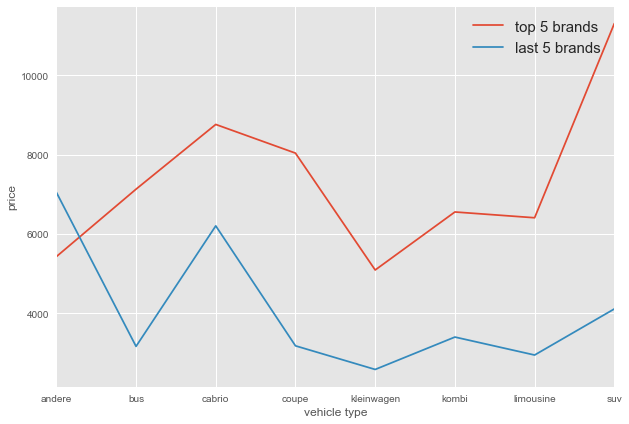

In [31]:
print ("The differences of prices between the top5 brands and the last 5 brands are listed below:")
print(topPopDf.groupby('vehicleType')['price'].mean() - lastPopDf.groupby('vehicleType')['price'].mean() )
plt.figure(figsize=(10,7))
a = topPopDf.groupby('vehicleType')['price'].mean()
a.plot(label='top 5 brands')
b = lastPopDf.groupby('vehicleType')['price'].mean()
b.plot(label='last 5 brands')
plt.xlabel('vehicle type')
plt.ylabel('price')
plt.legend(loc='upper right', prop={'size':15}) 
plt.show()

Most vehicle types of top 5 brands have higher mean prices than the last 5 brands especially suv type. The suv type of the top 5 brands group is $7191 higher than the last 5 brands group. However, for andere type, the famous level of brands did not influence the price of the selling used cars. The price of the last 5 brands is higher than the top 5 brnads. 

       meanTop  medianTop       stdTop     meanLast  medianLast      stdLast
0  6696.026173     5490.0  4676.250085  3285.566879      2499.0  2493.076397


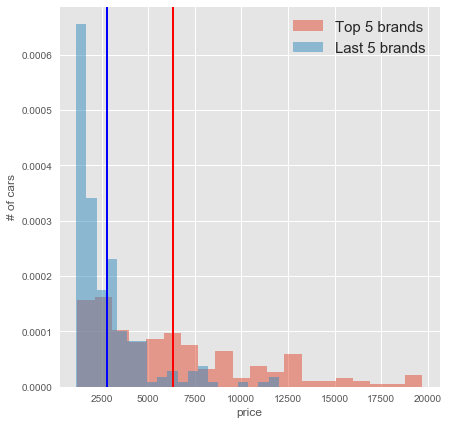

58.8534410151 % top 5 brands are less than mean price in the top 5 brands group
65.6050955414 % last 5 brands are less than mean price in the last 5 brands group


In [32]:
popDf = pd.DataFrame()
popDf['meanTop'] = [topPopDf['price'].mean()]
popDf['medianTop'] = [topPopDf['price'].median()]
popDf['stdTop'] = [topPopDf['price'].std()]
popDf['meanLast'] = [lastPopDf['price'].mean()]
popDf['medianLast'] = [lastPopDf['price'].median()]
popDf['stdLast'] = [lastPopDf['price'].std()]
print (popDf)

# # Randomly choice same sampling data points from top population and last population to compare the prices 
sample1 = np.random.choice(topPopDf['price'], 200, replace=True)
sample2 = np.random.choice(lastPopDf['price'], 200, replace=True)
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist(sample1, alpha=0.5, bins=20, normed=True, label='Top 5 brands')
plt.axvline(sample1.mean(), color='r', linestyle='solid', linewidth=2)
plt.hist(sample2, alpha=0.5, bins=20, normed=True, label='Last 5 brands')
plt.axvline(sample2.mean(), color='b', linestyle='solid', linewidth=2)
plt.xlabel('price')
plt.ylabel('# of cars')
plt.legend(loc='upper right', prop={'size':15}) 
plt.show()

#
tmpTop = topPopDf[topPopDf['price'] <= popDf['meanTop'].iloc[0]]
tmpLast = lastPopDf[lastPopDf['price'] <= popDf['meanLast'].iloc[0]]
ptgeTop = tmpTop.count()['price'] / len(topPopDf['price'])*100
ptgeLast = tmpLast.count()['price'] / len(lastPopDf['price'])*100
print ("{p} % top 5 brands are less than mean price in the top 5 brands group".format(p=str(ptgeTop)))
print ("{p} % last 5 brands are less than mean price in the last 5 brands group".format(p=str(ptgeLast)))

This two data sets are all skewed to the right. The mode is closer to the left of the graph and smaller than either the median or the mean. The mean (6696.026) of right-skewed top 5 brands data is located to the right side of the graph and is greater than the median (5490). The mean (3285.56) of right-skewed last 5 brands data is located to the right side of the graph and is greater than the median (2499). In addition, both groups have more than 55% data points that are all less than each mean price. This shape indicates that there are a number of data points, perhaps outliers, that are greater than the mode. Although the distributions are not normally distributed, we still can know the prices of the top 5 brands are higher than the last 5 brands.

### Compute the correlation matrix to see the key factors that would have an impact on used car performance

In [33]:
# Compute the correlation matrix
corr = wellData.corr()
corr.loc[:,'price'].abs().sort_values(ascending=False)[1:]

yearOfRegistration     0.565624
kilometer              0.430970
powerPS                0.410496
monthOfRegistration    0.036877
Name: price, dtype: float64

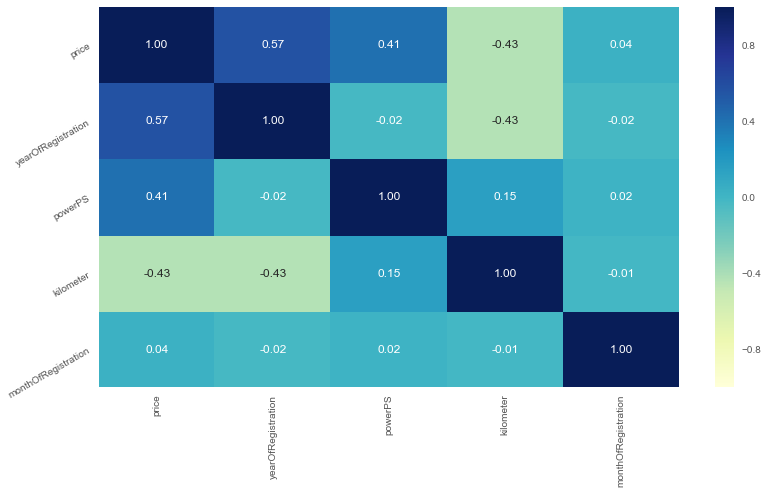

In [34]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f' ,cmap="YlGnBu")
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

From the correlation matrix, we can know powerPS, yearOfRegistration would be relevant to price, and kilometer would be relevant to powerPS. 

### Generate line plots for powerPS and kilometer

In [35]:
yearTopPopDf =  topPopDf[(topPopDf['yearOfRegistration'] >= 2014)]
yearLastPopDf = lastPopDf[lastPopDf['yearOfRegistration'] >= 2014]

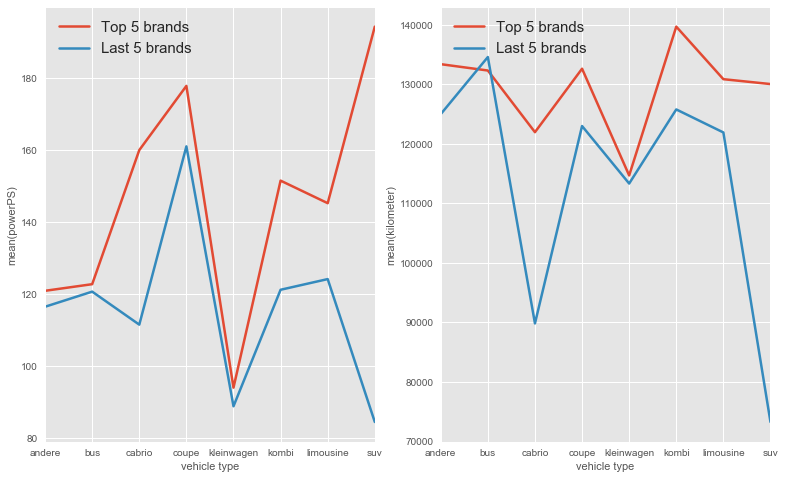

In [36]:
# Plot a line plot with powerPS
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
powerTop = topPopDf.groupby('vehicleType')['powerPS'].mean()
powerLast = lastPopDf.groupby('vehicleType')['powerPS'].mean()
powerTop.plot(label="Top 5 brands")
powerLast.plot(label="Last 5 brands")
plt.xlabel('vehicle type')
plt.ylabel('mean(powerPS)')
plt.legend(loc='upper left', prop={'size':15}) 
# Plot a line plot with kilometers
plt.subplot(1,2,2)
kmTop = topPopDf.groupby('vehicleType')['kilometer'].mean()
kmLast = lastPopDf.groupby('vehicleType')['kilometer'].mean()
kmTop.plot(label="Top 5 brands")
kmLast.plot(label="Last 5 brands")
plt.xlabel('vehicle type')
plt.ylabel('mean(kilometer)')
plt.legend(loc='upper left', prop={'size':15}) 

plt.show()

We can see that the red lines on the left line plot and right line plot are always higher than the blue line plots. 
Therefore, we can know that the top 5 brands have better performance than the last 5 brands. 

### Generate a scatter plot of  powerPS against kilometer with price as bubble size

In [37]:
topVList = topPopDf['vehicleType'].unique()

print ("Do a simple check for the top brand group to make sure each vehicle type has car info with years")
for v in topVList:
    print ("{v}: has {l} cars".format(v=v, l=len(topPopDf[(topPopDf['vehicleType'] == v)])))
    print (sorted(topPopDf['yearOfRegistration'].unique()))

Do a simple check for the top brand group to make sure each vehicle type has car info with years
coupe: has 7362 cars
[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
kleinwagen: has 9664 cars
[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
kombi: has 33315 cars
[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
bus: has 12576 cars
[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
limousine: has 46007 cars
[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
andere: has 732 cars
[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
nan: 

In [38]:
lastVList = lastPopDf['vehicleType'].unique()
for v in lastVList:
    print ("{v}: has {l} cars".format(v=v, l=len(lastPopDf[(lastPopDf['vehicleType'] == v)])))
    print (sorted(lastPopDf['yearOfRegistration'].unique()))

bus: has 61 cars
[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
kombi: has 57 cars
[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
limousine: has 156 cars
[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
kleinwagen: has 178 cars
[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
nan: has 0 cars
[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
cabrio: has 32 cars
[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
suv: has 108 cars
[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 20

In [39]:
lastPopDf[(lastPopDf['vehicleType'] == 'suv') & (lastPopDf['yearOfRegistration'] == 2011)]

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated
63398,5200,suv,2011,manuell,82,niva,50000,1,benzin,lada,nein,2016-03-05 00:00:00
89156,6500,suv,2011,manuell,83,niva,80000,3,benzin,lada,nein,2016-03-23 00:00:00
216049,6200,suv,2011,manuell,83,niva,20000,2,benzin,lada,nein,2016-03-09 00:00:00
232896,3850,suv,2011,manuell,82,NaN,40000,6,benzin,lada,ja,2016-03-08 00:00:00
234505,7000,suv,2011,manuell,83,niva,40000,11,benzin,lada,nein,2016-04-04 00:00:00
240484,3950,suv,2011,manuell,83,niva,60000,2,benzin,lada,nein,2016-03-19 00:00:00
266096,6500,suv,2011,manuell,82,niva,30000,2,benzin,lada,nein,2016-03-08 00:00:00
277718,6000,suv,2011,manuell,83,niva,20000,12,benzin,lada,nein,2016-04-01 00:00:00
277834,5900,suv,2011,manuell,83,niva,60000,3,benzin,lada,nein,2016-03-25 00:00:00


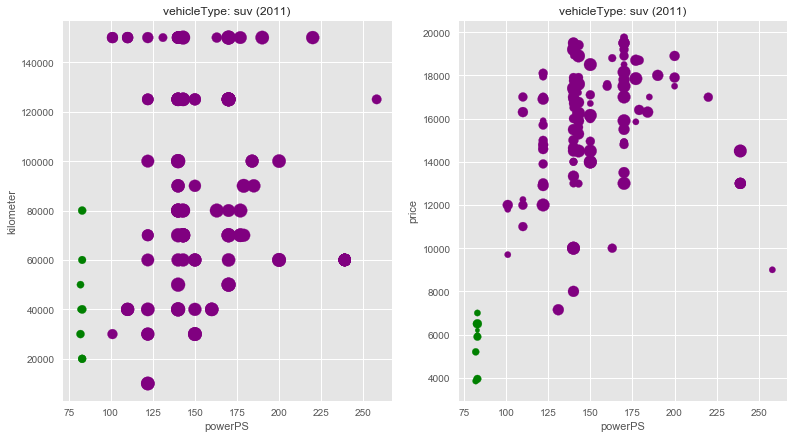

In [40]:
tmpTopDf =  topPopDf[(topPopDf['vehicleType'] == 'suv') & (topPopDf['yearOfRegistration'] == 2011)]
tmpLastDf = lastPopDf[(lastPopDf['vehicleType'] == 'suv') & (lastPopDf['yearOfRegistration'] == 2011)]
plt.figure(figsize=(13,7))
plt.subplot(1,2,1)
plt.scatter(
    x = tmpTopDf['powerPS'], y = tmpTopDf['kilometer'],
    color = 'purple', marker = 'o', s = tmpTopDf['price']*0.01
)
plt.scatter(
    x = tmpLastDf['powerPS'], y = tmpLastDf['kilometer'],
    color = 'green', marker = 'o', s = tmpLastDf['price']*0.01
)
plt.title("vehicleType: suv (2011)")
plt.xlabel("powerPS")
plt.ylabel("kilometer")
#########################
plt.subplot(1,2,2)
plt.scatter(
    x = tmpTopDf['powerPS'], y = tmpTopDf['price'],
    color = 'purple', marker = 'o', s = tmpLastDf['kilometer']*0.002
)
plt.scatter(
    x = tmpLastDf['powerPS'], y = tmpLastDf['price'],
    color = 'green', marker = 'o', s = tmpLastDf['kilometer']*0.001
)
plt.title("vehicleType: suv (2011)")
plt.xlabel("powerPS")
plt.ylabel("price")
plt.show()

The left scatter plot indicates that powerPS and kilometer these two variables are not correlated to each other. Howerver, the right scatter plot of powerPS versus price shows a weakly correlated positive linear relationship. It also indicates that the larger the powerPS is, the more the price is. 

In [41]:
topPopDf.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated
1,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00
3,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00
11,2799,kombi,2005,manuell,140,passat,150000,12,diesel,volkswagen,ja,2016-04-07 00:00:00
13,2500,kombi,2004,manuell,131,passat,150000,2,NaN,volkswagen,nein,2016-03-21 00:00:00
19,1850,bus,2004,manuell,102,a_klasse,150000,1,benzin,mercedes_benz,nein,2016-04-01 00:00:00


### Calculate the deprecation rate of the used cars

In [42]:
def calculate_deprication_rate(mGroupDf):
    yearOfRegList, meanPriceList = [],  []
    yearPriceDict = {}
    for year in mGroupDf['yearOfRegistration'].unique():
        yearPriceDict[year] = mGroup[(mGroupDf['yearOfRegistration'] == year)]['price'].mean()
    maxYear = max(yearPriceDict.keys())
    minYear = min(yearPriceDict.keys())
    deltaPrice = yearPriceDict[minYear] - yearPriceDict[maxYear]
    if (maxYear - minYear) != 0:
        depricationRate = deltaPrice / (maxYear - minYear)
    else:
        depricationRate = np.nan
    return depricationRate, maxYear, minYear, deltaPrice

In [43]:
topDepricationInfoDf = pd.DataFrame()
nameList = []
bList, vList, mList = [], [], []
yearStartList, yearEndList = [], []
deltaPriceList = []
depricationList = []
for brand, bGroup in topPopDf.groupby('brand'):
    for v, vGroup in bGroup.groupby('vehicleType'):
        for m, mGroup in vGroup.groupby('model'):
            nameList.append(brand + '_' + v + '_' + m)
            bList.append(brand)
            vList.append(v)
            mList.append(m)
            depriCationRate, maxYear, minYear, deltaPrice = calculate_deprication_rate(mGroup)
            depricationList.append(depriCationRate)
            yearStartList.append(minYear)
            yearEndList.append(maxYear)
            deltaPriceList.append(deltaPrice)
topDepricationInfoDf['brand'] = bList
topDepricationInfoDf['vehicleType'] = vList
topDepricationInfoDf['model'] = mList
topDepricationInfoDf['name'] = nameList
topDepricationInfoDf['yearStart'] = yearStartList
topDepricationInfoDf['yearEnd'] = yearEndList
topDepricationInfoDf['deltaPrice'] = deltaPriceList
topDepricationInfoDf['depricationRate'] = depricationList

In [44]:
topDepricationInfoDf = topDepricationInfoDf.set_index(topDepricationInfoDf['name'])
topDepricationInfoDf.dropna(inplace=True)
topDepricationInfoDf.head()

,brand,vehicleType,model,name,yearStart,yearEnd,deltaPrice,depricationRate
name,,,,,,,,
audi_andere_a2,audi,andere,a2,audi_andere_a2,2001,2004,-208.333333,-69.444444
audi_andere_a3,audi,andere,a3,audi_andere_a3,1997,2012,-13350.000000,-890.000000
audi_andere_a4,audi,andere,a4,audi_andere_a4,1999,2006,-5650.000000,-807.142857
audi_andere_a5,audi,andere,a5,audi_andere_a5,2008,2011,1445.000000,481.666667
audi_andere_a6,audi,andere,a6,audi_andere_a6,2003,2010,-13751.000000,-1964.428571


In [45]:
unknownDpInfoDf =  pd.DataFrame()
nameList = []
bList, vList, mList = [], [], []
yearStartList, yearEndList = [], []
deltaPriceList = []
depricationList = []
for brand, bGroup in lastPopDf.groupby('brand'):
    for v, vGroup in bGroup.groupby('vehicleType'):
        for m, mGroup in vGroup.groupby('model'):
            nameList.append(brand + '_' + v + '_' + m)
            bList.append(brand)
            vList.append(v)
            mList.append(m)
            depriCationRate, maxYear, minYear, deltaPrice = calculate_deprication_rate(mGroup)
            depricationList.append(depriCationRate)
            yearStartList.append(minYear)
            yearEndList.append(maxYear)
            deltaPriceList.append(deltaPrice)
unknownDpInfoDf['brand'] = bList
unknownDpInfoDf['vehicleType'] = vList
unknownDpInfoDf['model'] = mList
unknownDpInfoDf['name'] = nameList
unknownDpInfoDf['yearStart'] = yearStartList
unknownDpInfoDf['yearEnd'] = yearEndList
unknownDpInfoDf['deltaPrice'] = deltaPriceList
unknownDpInfoDf['depricationRate'] = depricationList
unknownDpInfoDf.dropna(inplace=True)
unknownDpInfoDf.head(5)

,brand,vehicleType,model,name,yearStart,yearEnd,deltaPrice,depricationRate
0,daewoo,bus,andere,daewoo_bus_andere,2002,2004,-637.5,-318.750000
2,daewoo,kleinwagen,andere,daewoo_kleinwagen_andere,1997,2005,740.0,92.500000
3,daewoo,kleinwagen,kalos,daewoo_kleinwagen_kalos,2002,2008,-890.0,-148.333333
4,daewoo,kleinwagen,lanos,daewoo_kleinwagen_lanos,2000,2004,-609.0,-152.250000
6,daewoo,kombi,andere,daewoo_kombi_andere,2002,2004,-80.0,-40.000000


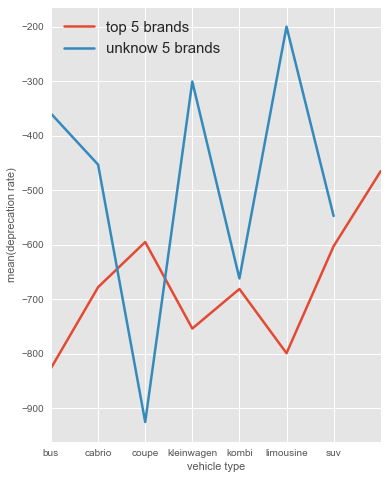

In [46]:
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
topDRate = topDepricationInfoDf.groupby('vehicleType').mean()['depricationRate']
unknowDRate = unknownDpInfoDf.groupby('vehicleType').mean()['depricationRate']
topDRate.plot(label='top 5 brands')
unknowDRate.plot(label='unknow 5 brands')
plt.xlabel('vehicle type')
plt.ylabel('mean(deprecation rate)')
plt.legend(loc='upper left', prop={'size':15}) 

The deprication rate is defined as the amount of values dropped per year. The last 5 brands group has a lowest deprecation rate when vehicle type is coupe. When the vehicle type is kombi, the deprecation rates of these two groups are very close. For the other vehicle types, the deprecation rates of the top 5 brands are lower than the last 5 brands.

# Conclusion

According to our original hypothese:
1. Top 5 brands have a higher price than the least 5 brands
2. Top 5 brands have better performance than the least 5 brands
3. Top 5 brands have lower deprecation rate than the least 5 brands

We found
1. The famous brands indeed have higher prices than the unknown brands
2. The famous brands have better performance than the unknown brands (the KPI used here is powerPS and kilometer)
3. Most vehicly types of the famous brands have lower deprecation rates than the unknown brands
